# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

In [1]:
## not implemented
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import os
import gzip
import sys
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import normalize 

In [2]:
PATH_DATASET = "data/UCI HAR Dataset/train"
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

#estructura
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [3]:
class PCA_numpy:

    def fit_and_transform(self, n_components, X):
        #normalizo restando la media y dividiendo por el desvio
        X = X - X.mean(axis=0)
        X = X / X.std(axis=0)
        #armo la matriz de covarianza
        cov = np.cov(X.T)
        # v son los autovalores y w los autovectores
        v, w = np.linalg.eig(cov)
        # obtengo los índices ordenados decrecientemente
        idx = v.argsort()[::-1]
        #ordeno los autovalores y autovectores
        v = v[idx]
        w = w[:, idx]
        # retorno los autovalores normalizados y la transformacion
        return v[:n_components]/sum(v), X.dot(w[:, :n_components])
    

/home/santiago/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


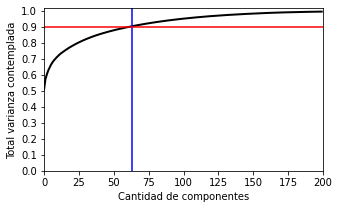

In [4]:
#instancio mi clase PCA
pca = PCA_numpy()
#hago el calculo solo para las componentes ppales que me dan el 90%
pca1 = pca.fit_and_transform(63, X_train)
#hago el calculo para las primeras 200 componentes
pca2 = pca.fit_and_transform(200, X_train)

plt.figure(figsize=(5,3))
#dibujo la varianza contemplada según componentes más importantes acumuladas
plt.plot(np.cumsum(pca2[0]), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show()


/home/santiago/.local/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


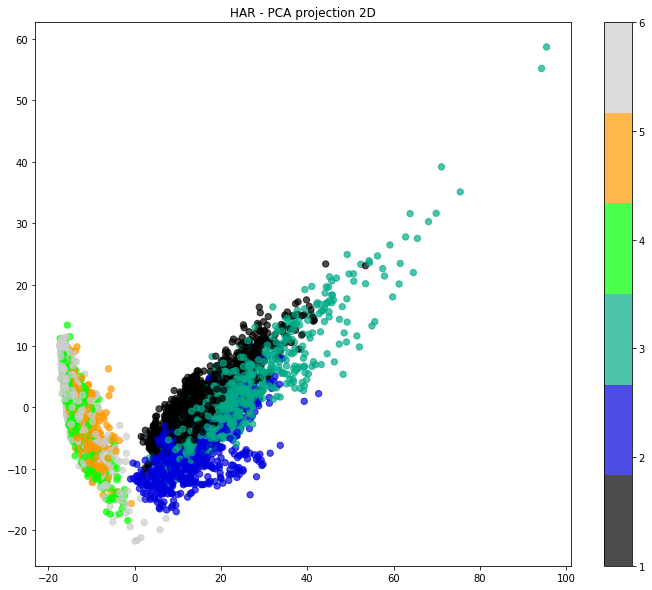

In [5]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(-pca1[1][:, 0], -pca1[1][:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [6]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
class KMeans:

    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
    
    def fit(self, X):

        
        # Initialize our centroids by picking random data points
        centroids = self.init_clusters(X, self.n_clusters)

        # Initialize the vectors in which we will store the
        # assigned classes of each data point and the
        # calculated distances from each centroid
        self.labels_ = np.zeros(X.shape[0], dtype=np.float64)
        distances = np.zeros([X.shape[0], self.n_clusters], dtype=np.float64)

        # Loop for the maximum number of iterations
        for i in range(self.n_init):

            # Assign all points to the nearest centroid
            for i, c in enumerate(centroids):
                distances[:, i] = self.get_distances(c, X)

            # obtengo el indice con la menor distancia para cada punto (categoria)
            self.labels_ = np.argmin(distances, axis=1)

            # actualizo los valores de los centroides
            for c in range(self.n_clusters):
                centroids[c] = np.mean(X[self.labels_ == c], 0)
    
    def init_clusters(self, p, k):
        #elijo k valores de los datos para iniciar los centroides
        return p[np.random.randint(p.shape[0], size=k)]
    
    def get_distances(self, centroid, p):
        #calculo la norma entre cada punto al centroide
        return np.linalg.norm(p - centroid, axis=1)

In [9]:
p = pca1[1]
k = 6

c = p[np.random.randint(p.shape[0], size=k)] 


Text(0.5, 1.0, 'HAR - PCA projection 2D')

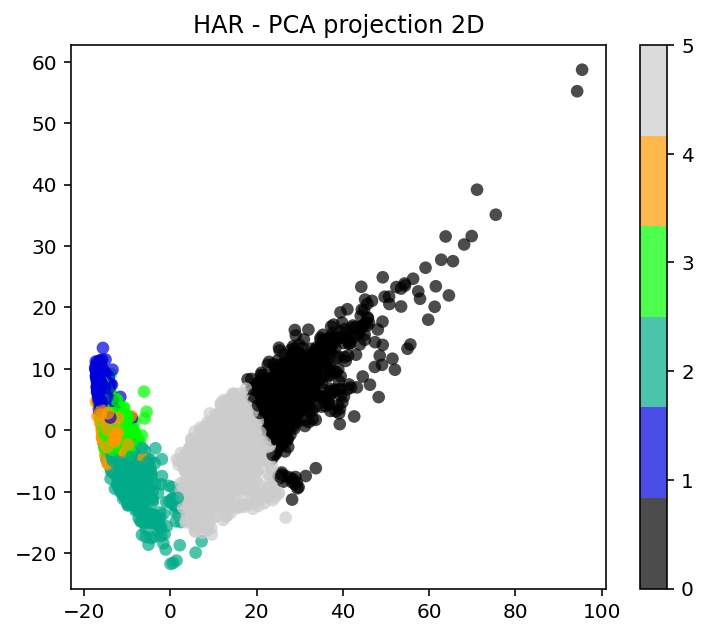

In [10]:
kmeans = KMeans(n_clusters=6, n_init=100)
kmeans.fit(pca1[1])
cluster_labels = kmeans.labels_
                           
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(6,5))
plt.scatter(-pca1[1][:, 0], -pca1[1][:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D')

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

En el caso del Ejercicio 1, la diferencia entre lo visto en clase (sklearns) con lo implementado en numpy no reviste grandes diferencias.

/home/santiago/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


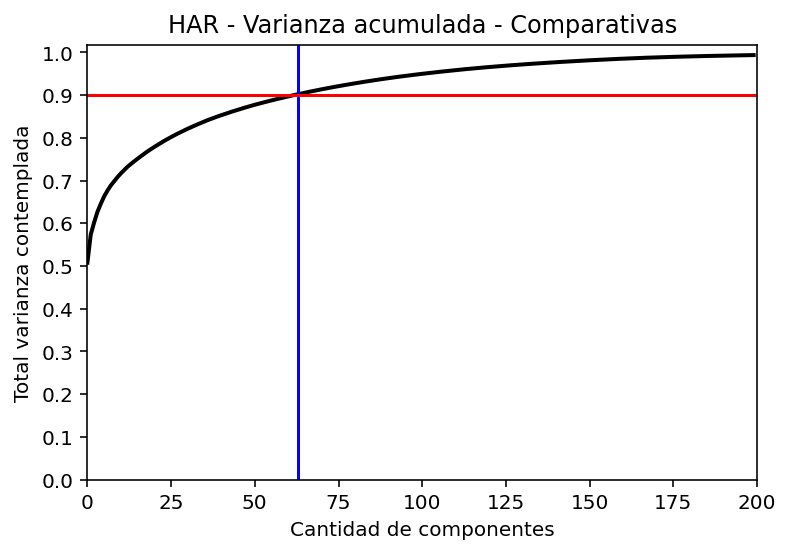

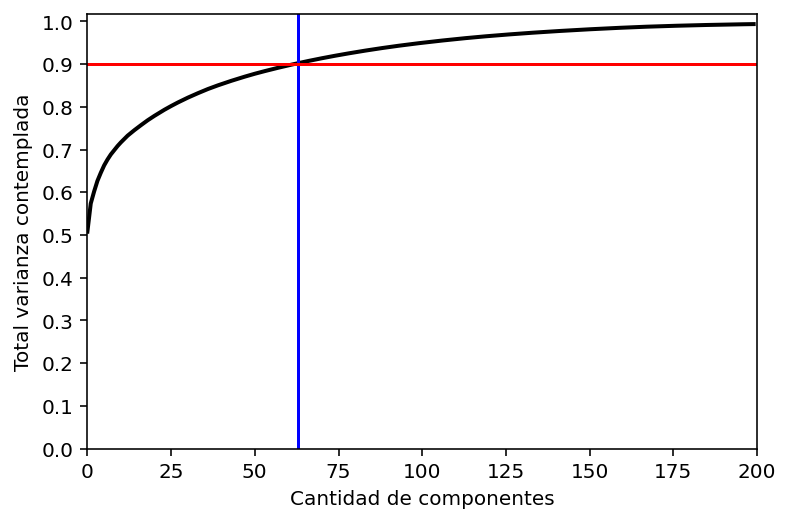

In [13]:
from sklearn.preprocessing import StandardScaler
RANDOM_STATE = 17

#grafico numpy vs sklearns
plt.title('HAR - Varianza acumulada - Comparativas')
#dibujo la varianza contemplada según componentes más importantes acumuladas
plt.plot(np.cumsum(pca2[0]), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show()

scaler = StandardScaler()
X_pca_sk = scaler.fit_transform(X_train)
pca2_sk = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_pca_sk)
plt.plot(np.cumsum(pca2_sk.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show()

En el caso del Ejercicio 2, la diferencia entre lo visto en clase (sklearns) con lo implementado en numpy difiere bastante entre sí, e incluso difiere al comparar entre iteraciones del mismo algoritmo. Esto se debe entre otras razones a la forma de tomar los valores iniciales de los centroides.

/home/santiago/.local/lib/python3.8/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


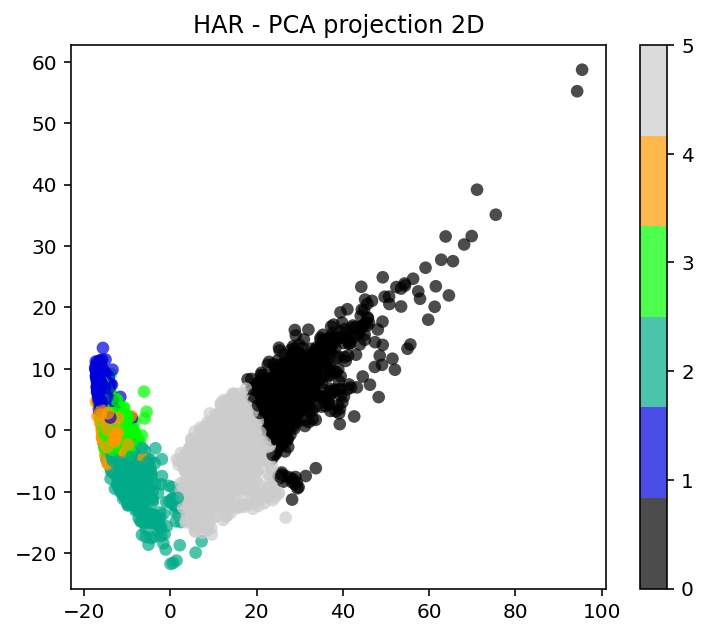

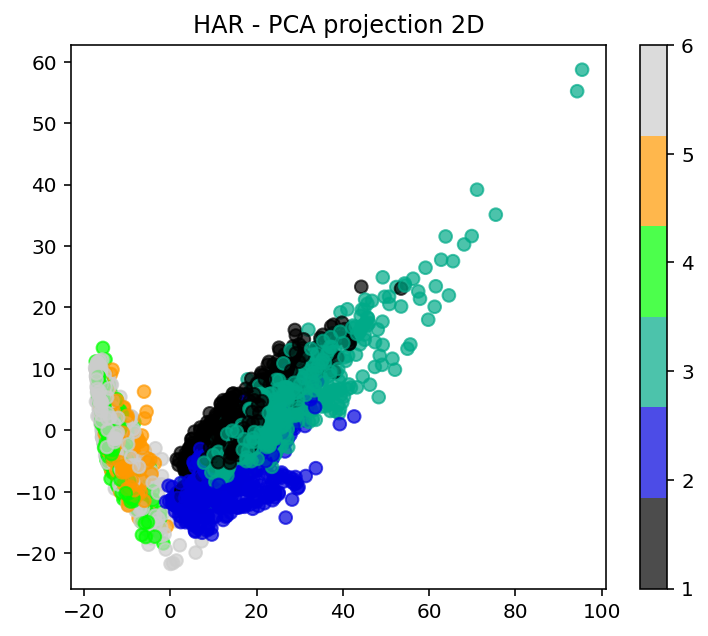

In [16]:
# Graficamos los primeros dos componentes - numpy
plt.figure(figsize=(6,5))
plt.scatter(-pca1[1][:, 0], -pca1[1][:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D')

# Graficamos los primeros dos componentes - sklearn
pca1_sk = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_pca_sk)
X_pca1_sk = pca1_sk.transform(X_pca_sk)

plt.figure(figsize=(6,5))
plt.scatter(X_pca1_sk[:, 0], X_pca1_sk[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 

In [17]:
import numpy as np
import sklearn
import tensorflow as tf
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt


2022-05-19 09:32:09.074351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 09:32:09.074372: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [18]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [19]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = x_train

In [20]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)
pca_2 = PCA(n_components=250, random_state=RANDOM_STATE).fit(X_scaled)


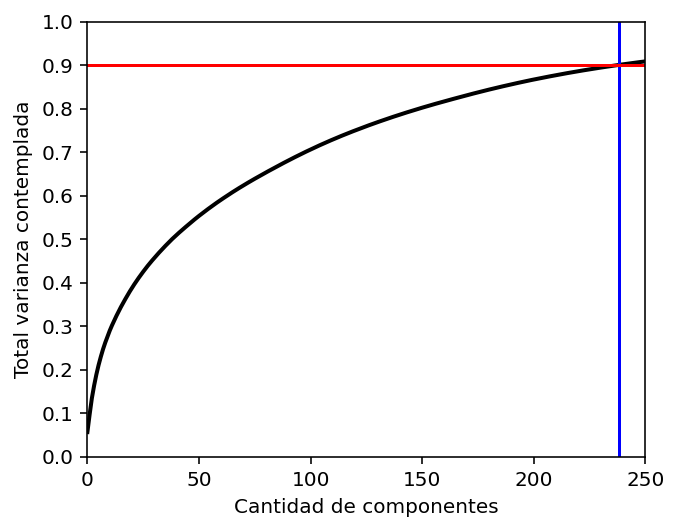

Se captura el 90% con 238 componentes principales


In [22]:

num_components = pca.explained_variance_ratio_.shape[0]
plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 250)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(num_components, c='b')
plt.axhline(0.9, c='r')
plt.show();

print("Se captura el 90% con {} componentes principales".format(num_components))


In [23]:
kmeans = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

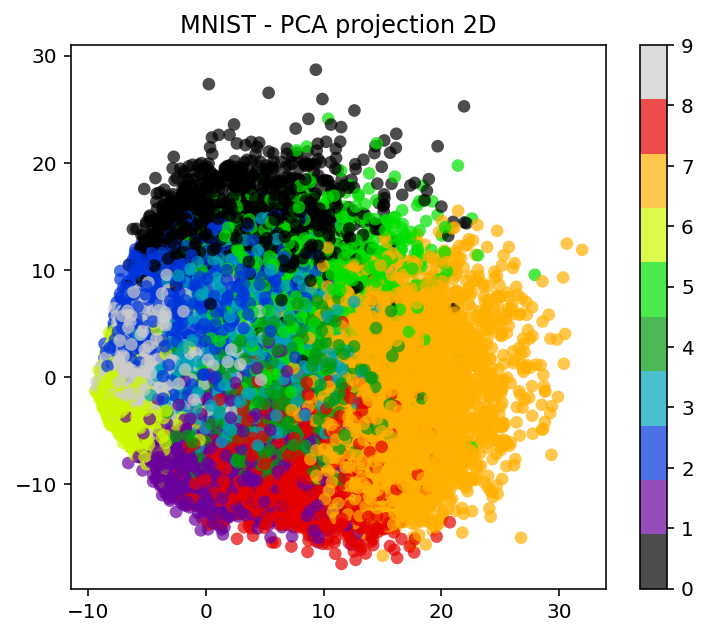

In [25]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('MNIST - PCA projection 2D');